In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
results_df = pd.read_csv('output/metrics_results.csv',index_col=False)
results_df = results_df.round(3)
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1 (macro avg),Balanced accuracy,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1 (0),F1 (1),CM
0,LR-Imbalanced data,0.895,0.791,0.527,0.525,0.527,0.736,0.685,0.897,0.057,0.997,0.105,0.944,[[ 61 1010]\n [ 28 8752]]
1,LR-SMOTE,0.681,0.573,0.672,0.551,0.672,0.738,0.203,0.943,0.660,0.683,0.310,0.792,[[ 707 364]\n [2783 5997]]
2,LR-SMOTE Tomek Links,0.681,0.573,0.673,0.552,0.673,0.738,0.203,0.943,0.662,0.684,0.311,0.793,[[ 709 362]\n [2777 6003]]
3,XGB-Imbalanced data,0.898,0.812,0.550,0.564,0.550,0.752,0.723,0.901,0.105,0.995,0.183,0.946,[[ 112 959]\n [ 43 8737]]
4,XGB-SMOTE,0.892,0.710,0.566,0.587,0.566,0.731,0.516,0.905,0.149,0.983,0.232,0.942,[[ 160 911]\n [ 150 8630]]
5,XGB-SMOTE Tomek Links,0.891,0.703,0.568,0.589,0.568,0.724,0.502,0.905,0.155,0.981,0.237,0.942,[[ 166 905]\n [ 165 8615]]
6,LGBM-Imbalanced data,0.897,0.788,0.549,0.563,0.549,0.752,0.675,0.901,0.105,0.994,0.181,0.945,[[ 112 959]\n [ 54 8726]]
7,LGBM-SMOTE,0.892,0.712,0.587,0.613,0.587,0.735,0.515,0.909,0.197,0.977,0.285,0.942,[[ 211 860]\n [ 199 8581]]
8,LGBM-SMOTE Tomek Links,0.890,0.700,0.590,0.615,0.590,0.736,0.490,0.909,0.205,0.974,0.289,0.941,[[ 220 851]\n [ 229 8551]]
9,SVM-Imbalanced data,0.895,0.839,0.521,0.514,0.521,0.591,0.783,0.895,0.044,0.999,0.083,0.944,[[ 47 1024]\n [ 13 8767]]


In [19]:
results_df[['Model', 'AUC', 'Precision (0)',
       'Precision (1)', 'Recall (0)', 'Recall (1)', 'F1 (0)', 'F1 (1)']]

,Model,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1 (0),F1 (1)
0,LR-Imbalanced data,0.736,0.685,0.897,0.057,0.997,0.105,0.944
1,LR-SMOTE,0.738,0.203,0.943,0.660,0.683,0.310,0.792
2,LR-SMOTE Tomek Links,0.738,0.203,0.943,0.662,0.684,0.311,0.793
3,XGB-Imbalanced data,0.752,0.723,0.901,0.105,0.995,0.183,0.946
4,XGB-SMOTE,0.731,0.516,0.905,0.149,0.983,0.232,0.942
5,XGB-SMOTE Tomek Links,0.724,0.502,0.905,0.155,0.981,0.237,0.942
6,LGBM-Imbalanced data,0.752,0.675,0.901,0.105,0.994,0.181,0.945
7,LGBM-SMOTE,0.735,0.515,0.909,0.197,0.977,0.285,0.942
8,LGBM-SMOTE Tomek Links,0.736,0.490,0.909,0.205,0.974,0.289,0.941
9,SVM-Imbalanced data,0.591,0.783,0.895,0.044,0.999,0.083,0.944


In [20]:
columns = results_df.columns
print(columns)

Index(['Model', 'Accuracy', 'Precision (macro avg)', 'Recall (macro avg)',
       'F1 (macro avg)', 'Balanced accuracy', 'AUC', 'Precision (0)',
       'Precision (1)', 'Recall (0)', 'Recall (1)', 'F1 (0)', 'F1 (1)', 'CM'],
      dtype='object')


In [21]:
def split_name(model):
    name_list = model.split('-')
    return name_list

results_df['Resampling'] = results_df['Model'].apply(lambda x: split_name(x)[1])
results_df['Algorithm'] = results_df['Model'].apply(lambda x: split_name(x)[0])
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1 (macro avg),Balanced accuracy,AUC,Precision (0),Precision (1),Recall (0),Recall (1),F1 (0),F1 (1),CM,Resampling,Algorithm
0,LR-Imbalanced data,0.895,0.791,0.527,0.525,0.527,0.736,0.685,0.897,0.057,0.997,0.105,0.944,[[ 61 1010]\n [ 28 8752]],Imbalanced data,LR
1,LR-SMOTE,0.681,0.573,0.672,0.551,0.672,0.738,0.203,0.943,0.660,0.683,0.310,0.792,[[ 707 364]\n [2783 5997]],SMOTE,LR
2,LR-SMOTE Tomek Links,0.681,0.573,0.673,0.552,0.673,0.738,0.203,0.943,0.662,0.684,0.311,0.793,[[ 709 362]\n [2777 6003]],SMOTE Tomek Links,LR
3,XGB-Imbalanced data,0.898,0.812,0.550,0.564,0.550,0.752,0.723,0.901,0.105,0.995,0.183,0.946,[[ 112 959]\n [ 43 8737]],Imbalanced data,XGB
4,XGB-SMOTE,0.892,0.710,0.566,0.587,0.566,0.731,0.516,0.905,0.149,0.983,0.232,0.942,[[ 160 911]\n [ 150 8630]],SMOTE,XGB
5,XGB-SMOTE Tomek Links,0.891,0.703,0.568,0.589,0.568,0.724,0.502,0.905,0.155,0.981,0.237,0.942,[[ 166 905]\n [ 165 8615]],SMOTE Tomek Links,XGB
6,LGBM-Imbalanced data,0.897,0.788,0.549,0.563,0.549,0.752,0.675,0.901,0.105,0.994,0.181,0.945,[[ 112 959]\n [ 54 8726]],Imbalanced data,LGBM
7,LGBM-SMOTE,0.892,0.712,0.587,0.613,0.587,0.735,0.515,0.909,0.197,0.977,0.285,0.942,[[ 211 860]\n [ 199 8581]],SMOTE,LGBM
8,LGBM-SMOTE Tomek Links,0.890,0.700,0.590,0.615,0.590,0.736,0.490,0.909,0.205,0.974,0.289,0.941,[[ 220 851]\n [ 229 8551]],SMOTE Tomek Links,LGBM
9,SVM-Imbalanced data,0.895,0.839,0.521,0.514,0.521,0.591,0.783,0.895,0.044,0.999,0.083,0.944,[[ 47 1024]\n [ 13 8767]],Imbalanced data,SVM


In [22]:
results_df=results_df.rename(columns = {'F1 (1)': 'F1','Precision (1)':'Precision','Recall (1)':'Recall'})
results_df

,Model,Accuracy,Precision (macro avg),Recall (macro avg),F1 (macro avg),Balanced accuracy,AUC,Precision (0),Precision,Recall (0),Recall,F1 (0),F1,CM,Resampling,Algorithm
0,LR-Imbalanced data,0.895,0.791,0.527,0.525,0.527,0.736,0.685,0.897,0.057,0.997,0.105,0.944,[[ 61 1010]\n [ 28 8752]],Imbalanced data,LR
1,LR-SMOTE,0.681,0.573,0.672,0.551,0.672,0.738,0.203,0.943,0.660,0.683,0.310,0.792,[[ 707 364]\n [2783 5997]],SMOTE,LR
2,LR-SMOTE Tomek Links,0.681,0.573,0.673,0.552,0.673,0.738,0.203,0.943,0.662,0.684,0.311,0.793,[[ 709 362]\n [2777 6003]],SMOTE Tomek Links,LR
3,XGB-Imbalanced data,0.898,0.812,0.550,0.564,0.550,0.752,0.723,0.901,0.105,0.995,0.183,0.946,[[ 112 959]\n [ 43 8737]],Imbalanced data,XGB
4,XGB-SMOTE,0.892,0.710,0.566,0.587,0.566,0.731,0.516,0.905,0.149,0.983,0.232,0.942,[[ 160 911]\n [ 150 8630]],SMOTE,XGB
5,XGB-SMOTE Tomek Links,0.891,0.703,0.568,0.589,0.568,0.724,0.502,0.905,0.155,0.981,0.237,0.942,[[ 166 905]\n [ 165 8615]],SMOTE Tomek Links,XGB
6,LGBM-Imbalanced data,0.897,0.788,0.549,0.563,0.549,0.752,0.675,0.901,0.105,0.994,0.181,0.945,[[ 112 959]\n [ 54 8726]],Imbalanced data,LGBM
7,LGBM-SMOTE,0.892,0.712,0.587,0.613,0.587,0.735,0.515,0.909,0.197,0.977,0.285,0.942,[[ 211 860]\n [ 199 8581]],SMOTE,LGBM
8,LGBM-SMOTE Tomek Links,0.890,0.700,0.590,0.615,0.590,0.736,0.490,0.909,0.205,0.974,0.289,0.941,[[ 220 851]\n [ 229 8551]],SMOTE Tomek Links,LGBM
9,SVM-Imbalanced data,0.895,0.839,0.521,0.514,0.521,0.591,0.783,0.895,0.044,0.999,0.083,0.944,[[ 47 1024]\n [ 13 8767]],Imbalanced data,SVM


# 2. Model comparison

In [23]:


col_list=['Model', 'F1','AUC','Precision','Recall']
results_df[results_df['Resampling']=='Imbalanced data'][col_list]


,Model,F1,AUC,Precision,Recall
0,LR-Imbalanced data,0.944,0.736,0.897,0.997
3,XGB-Imbalanced data,0.946,0.752,0.901,0.995
6,LGBM-Imbalanced data,0.945,0.752,0.901,0.994
9,SVM-Imbalanced data,0.944,0.591,0.895,0.999


In [24]:

results_df[results_df['Resampling']=='SMOTE'][col_list]


,Model,F1,AUC,Precision,Recall
1,LR-SMOTE,0.792,0.738,0.943,0.683
4,XGB-SMOTE,0.942,0.731,0.905,0.983
7,LGBM-SMOTE,0.942,0.735,0.909,0.977
10,SVM-SMOTE,0.821,0.739,0.940,0.729


In [25]:
results_df[results_df['Resampling']=='SMOTE Tomek Links'][col_list]


,Model,F1,AUC,Precision,Recall
2,LR-SMOTE Tomek Links,0.793,0.738,0.943,0.684
5,XGB-SMOTE Tomek Links,0.942,0.724,0.905,0.981
8,LGBM-SMOTE Tomek Links,0.941,0.736,0.909,0.974
11,SVM-SMOTE Tomek Links,0.821,0.738,0.940,0.729


# 2. Resampling method comparison

SMOTE and SMOTE - Tomek Links performed equally well in terms of F1 score and AUC

In [26]:
results_df[results_df['Algorithm']=='LR'][col_list]

,Model,F1,AUC,Precision,Recall
0,LR-Imbalanced data,0.944,0.736,0.897,0.997
1,LR-SMOTE,0.792,0.738,0.943,0.683
2,LR-SMOTE Tomek Links,0.793,0.738,0.943,0.684


In [27]:
results_df[results_df['Algorithm']=='XGB'][col_list]

,Model,F1,AUC,Precision,Recall
3,XGB-Imbalanced data,0.946,0.752,0.901,0.995
4,XGB-SMOTE,0.942,0.731,0.905,0.983
5,XGB-SMOTE Tomek Links,0.942,0.724,0.905,0.981


In [28]:
results_df[results_df['Algorithm']=='LGBM'][col_list]


,Model,F1,AUC,Precision,Recall
6,LGBM-Imbalanced data,0.945,0.752,0.901,0.994
7,LGBM-SMOTE,0.942,0.735,0.909,0.977
8,LGBM-SMOTE Tomek Links,0.941,0.736,0.909,0.974


In [29]:
results_df[results_df['Algorithm']=='SVM'][col_list]

,Model,F1,AUC,Precision,Recall
9,SVM-Imbalanced data,0.944,0.591,0.895,0.999
10,SVM-SMOTE,0.821,0.739,0.940,0.729
11,SVM-SMOTE Tomek Links,0.821,0.738,0.940,0.729


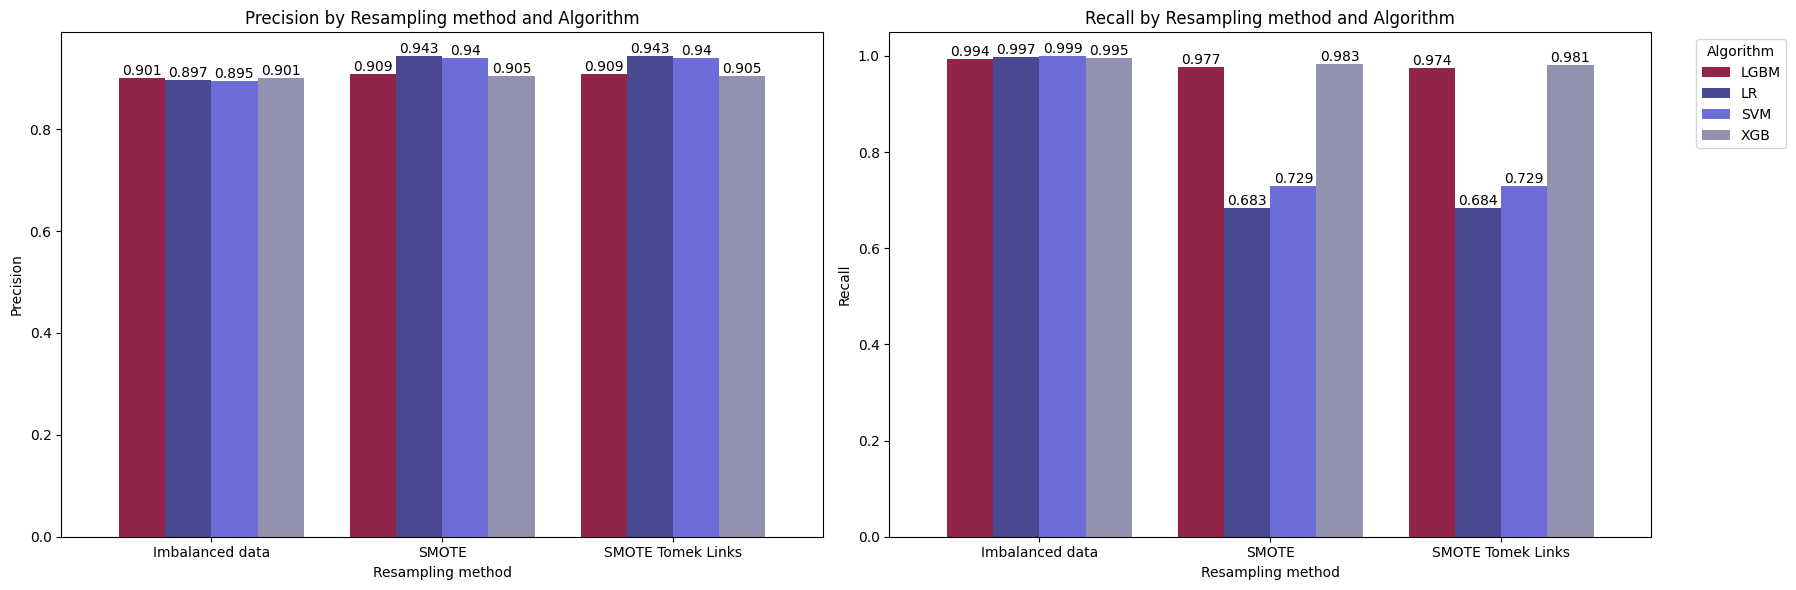

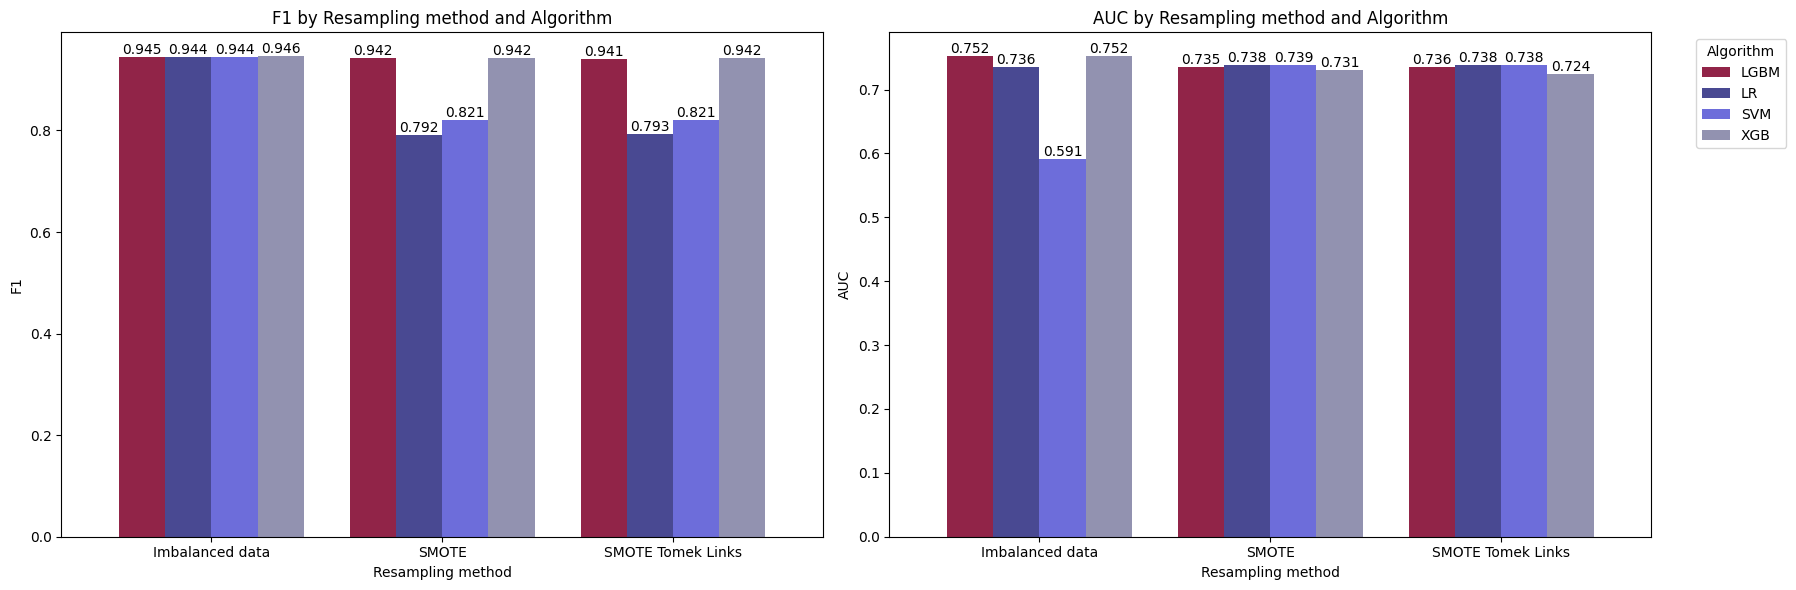

In [30]:
metrics_list_1 = ['Precision', 'Recall']
metrics_list_2 = ['F1', 'AUC']

custom_colors = sns.color_palette("gist_stern")

# Create the first plot with subplots for precision and recall
fig, axs1 = plt.subplots(1, 2, figsize=(18, 6))
for i, metric in enumerate(metrics_list_1):
    pivot_table = pd.pivot_table(results_df, values=metric, index='Resampling', columns='Algorithm')
    ax = pivot_table.plot(kind='bar', ax=axs1[i], width=0.8, color=custom_colors)
    ax.set_title(f'{metric} by Resampling method and Algorithm')
    ax.set_xlabel('Resampling method')
    ax.set_ylabel(metric)
    if i == 1:  # Only show legend for the last subplot
        ax.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()  # Remove legend for other subplots
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()

# Create the second plot with subplots for F1 and AUC
fig, axs2 = plt.subplots(1, 2, figsize=(18, 6))
for i, metric in enumerate(metrics_list_2):
    pivot_table = pd.pivot_table(results_df, values=metric, index='Resampling', columns='Algorithm')
    ax = pivot_table.plot(kind='bar', ax=axs2[i], width=0.8, color=custom_colors)
    ax.set_title(f'{metric} by Resampling method and Algorithm')
    ax.set_xlabel('Resampling method')
    ax.set_ylabel(metric)
    if i == 1:  # Only show legend for the last subplot
        ax.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        ax.get_legend().remove()  # Remove legend for other subplots
    ax.tick_params(axis='x', rotation=0)  # Rotate x-axis labels
    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()